# Import Packages

In [1]:
import random
import numpy as np

import matplotlib.pyplot as plt

# Multi-Armed Bandit

In [2]:
class Multi_Armed_Bandit:
    def __init__(self):
        self.num_arms = 5
        self.distributions = [
            lambda : np.random.rayleigh(1) - 0.75,
            lambda : np.random.gamma(0.8, 0.9) - 1,
            lambda : np.random.binomial(1, 0.5) - 0.5,
            lambda : np.random.normal(0, 1),
            lambda : np.random.choice(np.random.dirichlet((10, 5, 3))) - 0.5,
        ]
        random.shuffle(self.distributions)
        self.reward_distributions = {i:self.distributions[i] for i in range(self.num_arms)}
        
    def pull(self, arm):
        assert 0 <= arm < self.num_arms
        return self.reward_distributions[arm]()
    

# Run with random policy

In [3]:
# bandit instance
bandit = Multi_Armed_Bandit()

# records
arm_rewards = {i:[] for i in range(5)}
total_rewards= []

for t in range(500):
    # random
    arm = np.random.choice(5)
        
    # pull
    reward = bandit.pull(arm)
    
    # record
    arm_rewards[arm] += [reward]
    total_rewards += [reward]
    

# Visualizaiton
- Rewards of pulling each arm
- cumulative rewards of pulling each arm
- cumulative total reward

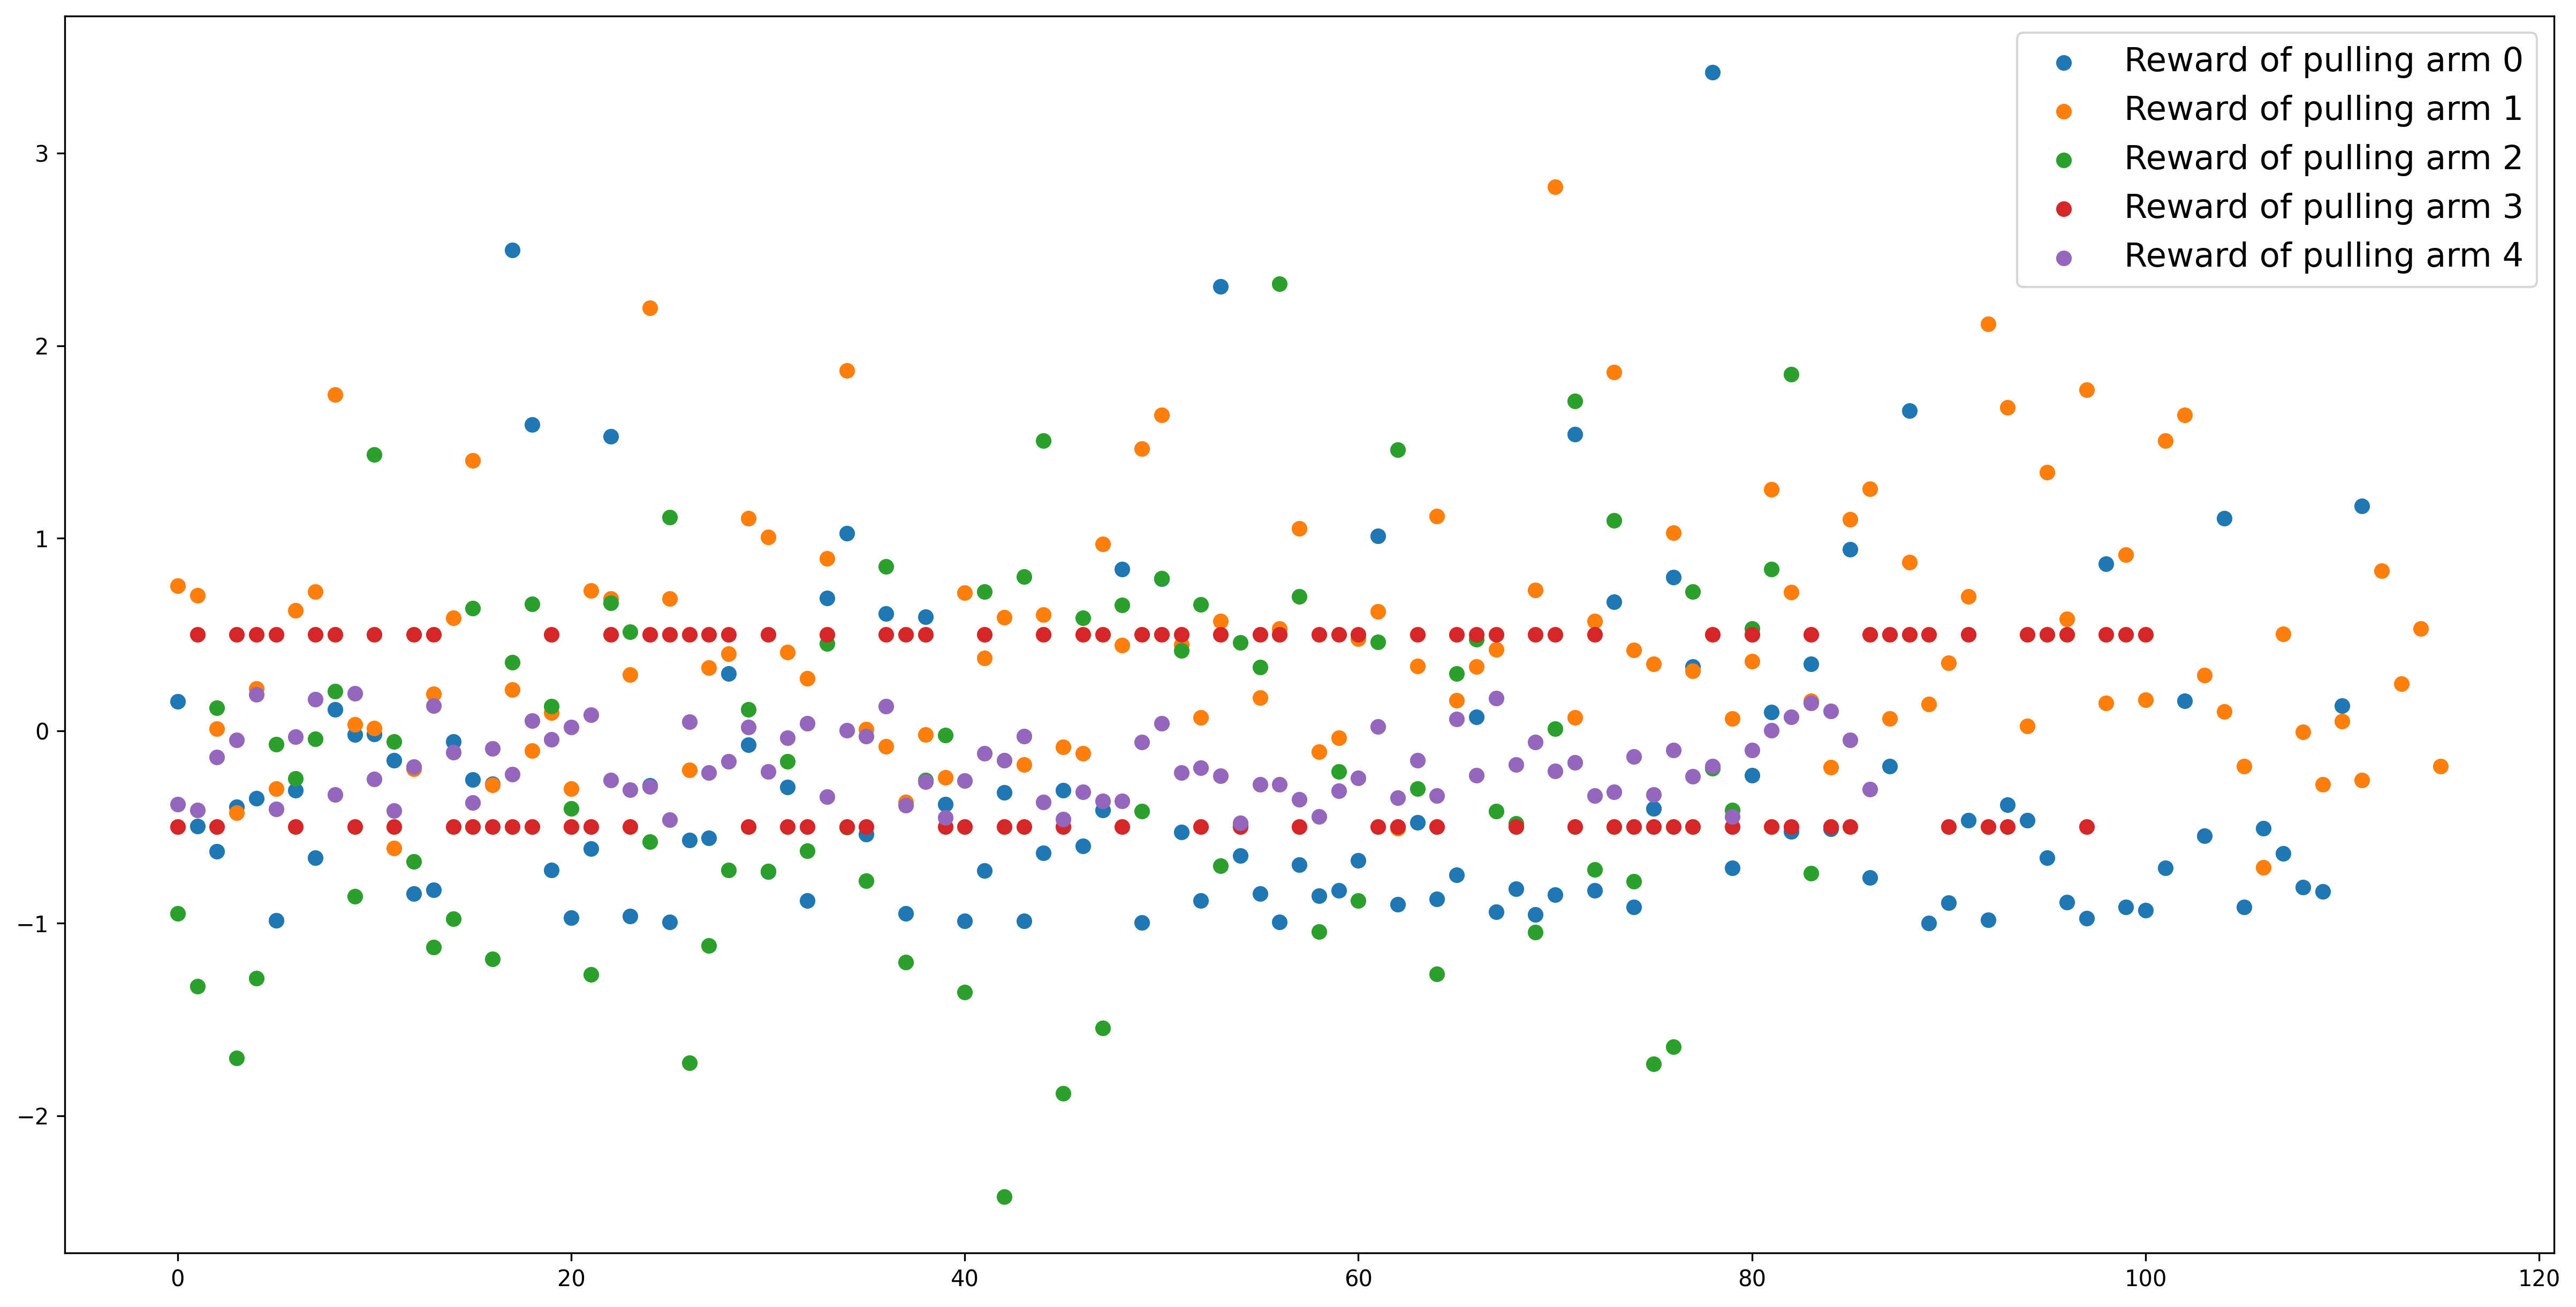

In [4]:
# plot rewards per arm
plt.figure(figsize=(20, 10), dpi=300)
for i in range(5):
    plt.scatter(range(len(arm_rewards[i])), arm_rewards[i], label='Reward of pulling arm {}'.format(i))

plt.legend(fontsize=15)
plt.show()
plt.close()

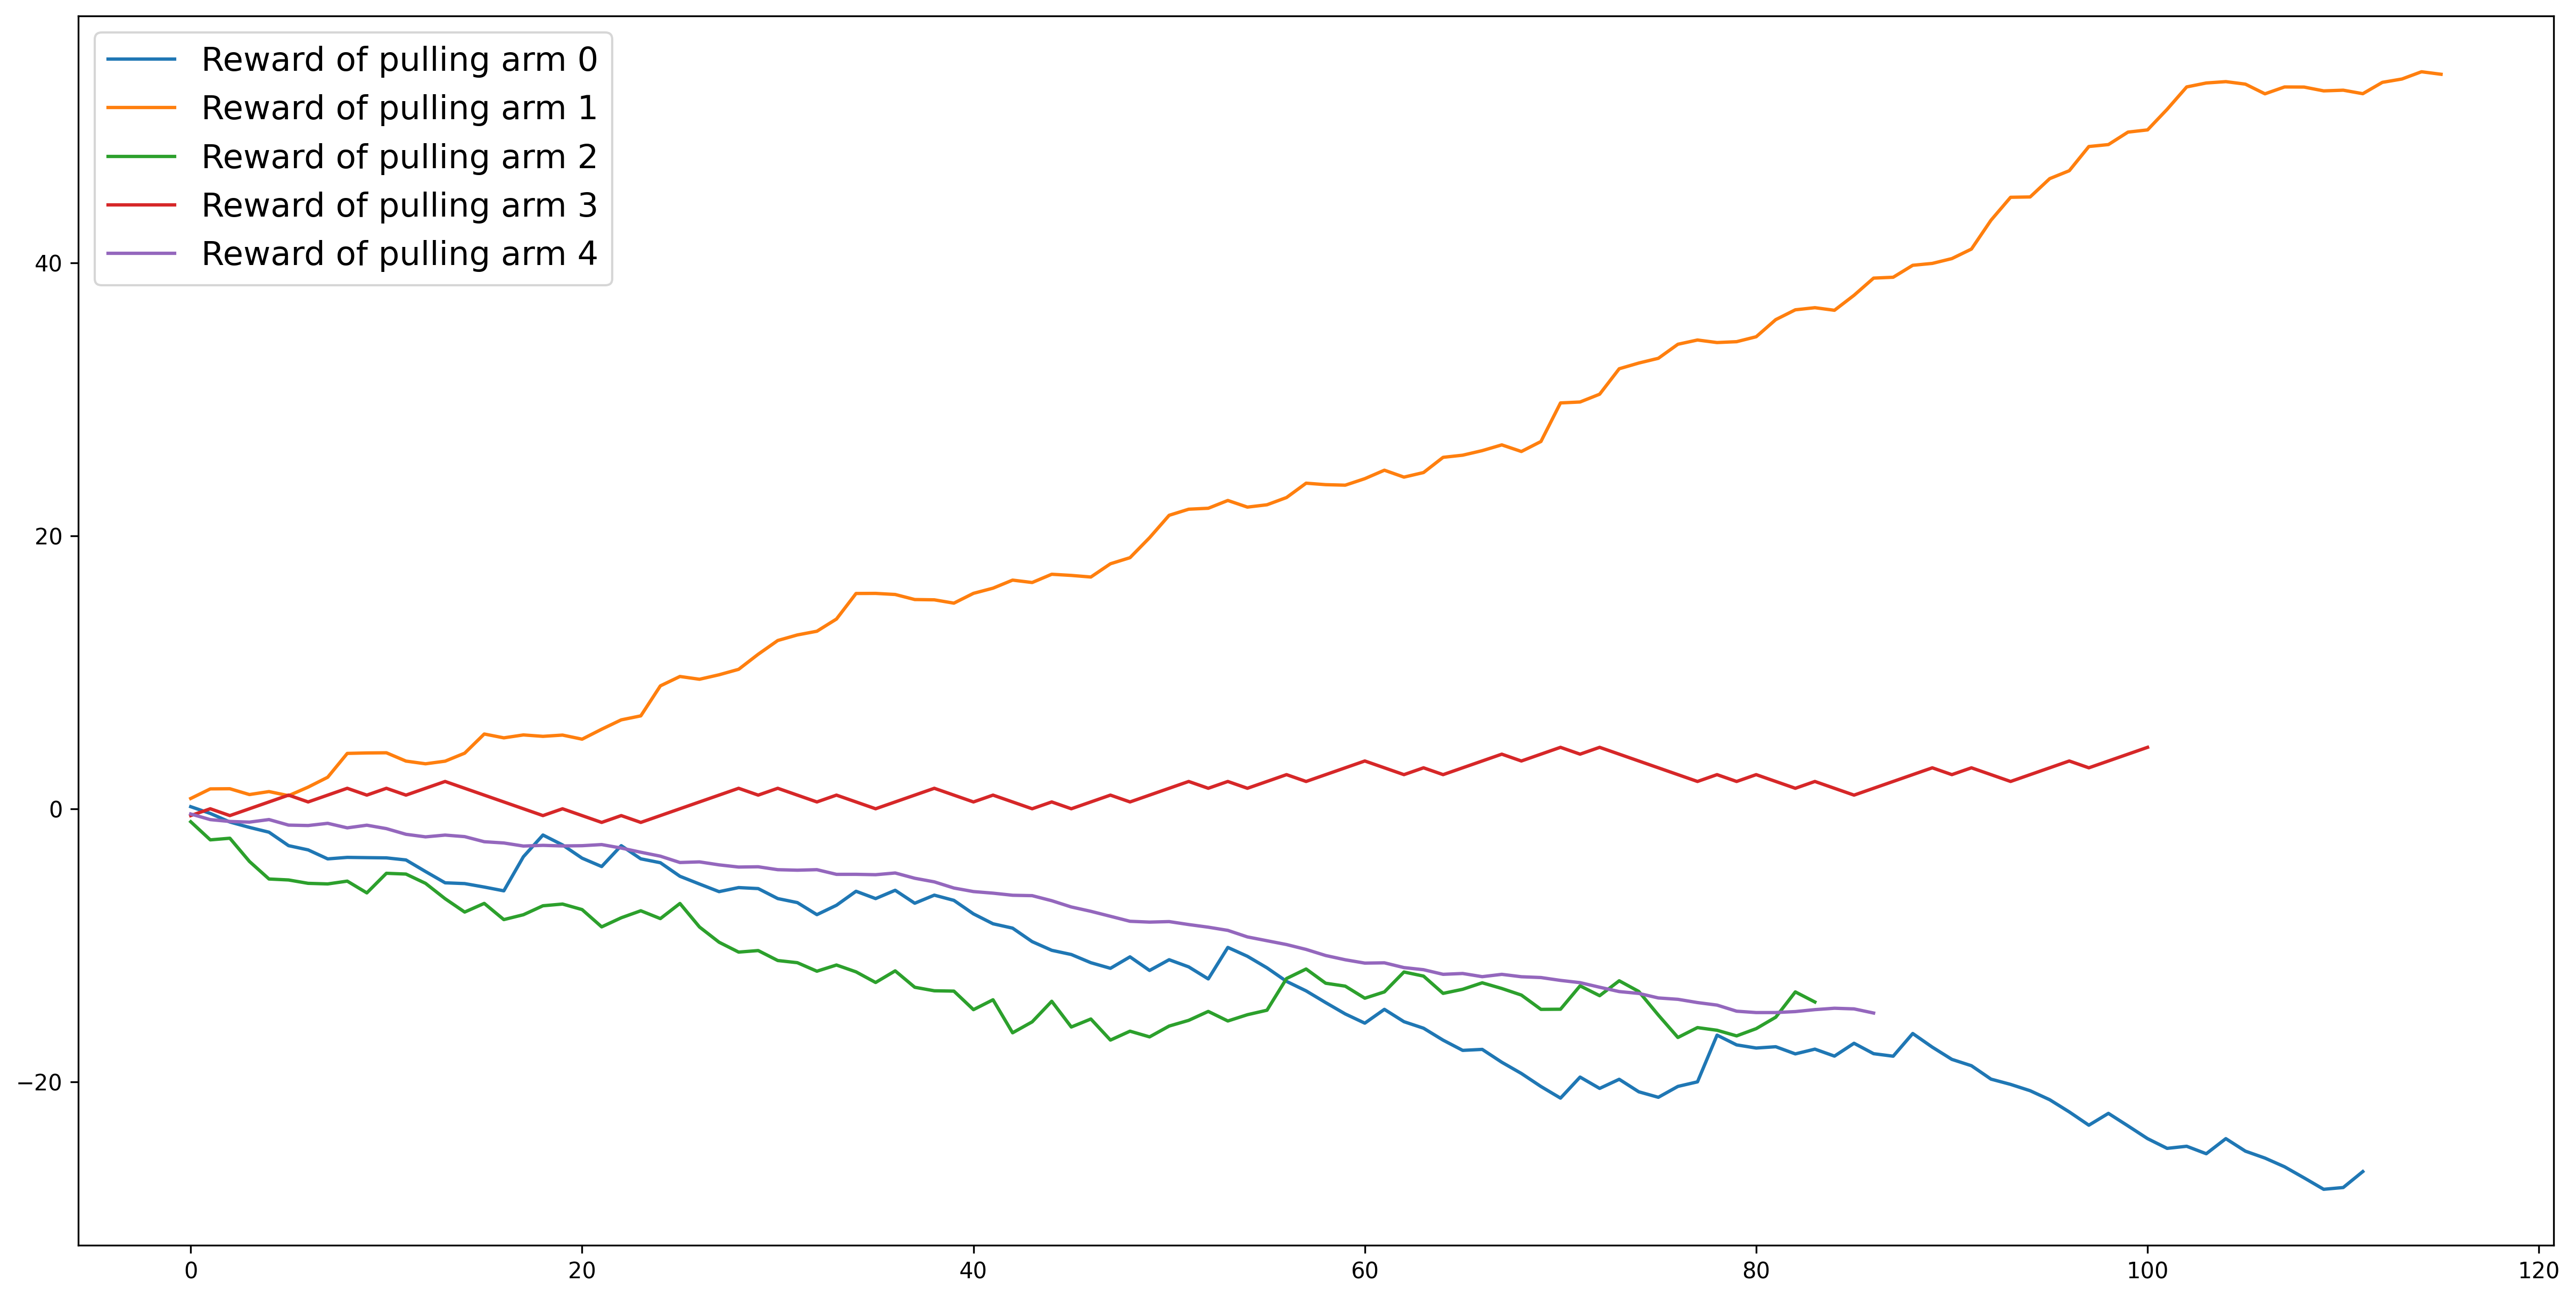

In [5]:
# plot rewards per arm
plt.figure(figsize=(20, 10), dpi=300)
for i in range(5):
    plt.plot(np.cumsum(arm_rewards[i]), label='Reward of pulling arm {}'.format(i))

plt.legend(fontsize=15)
plt.show()
plt.close()

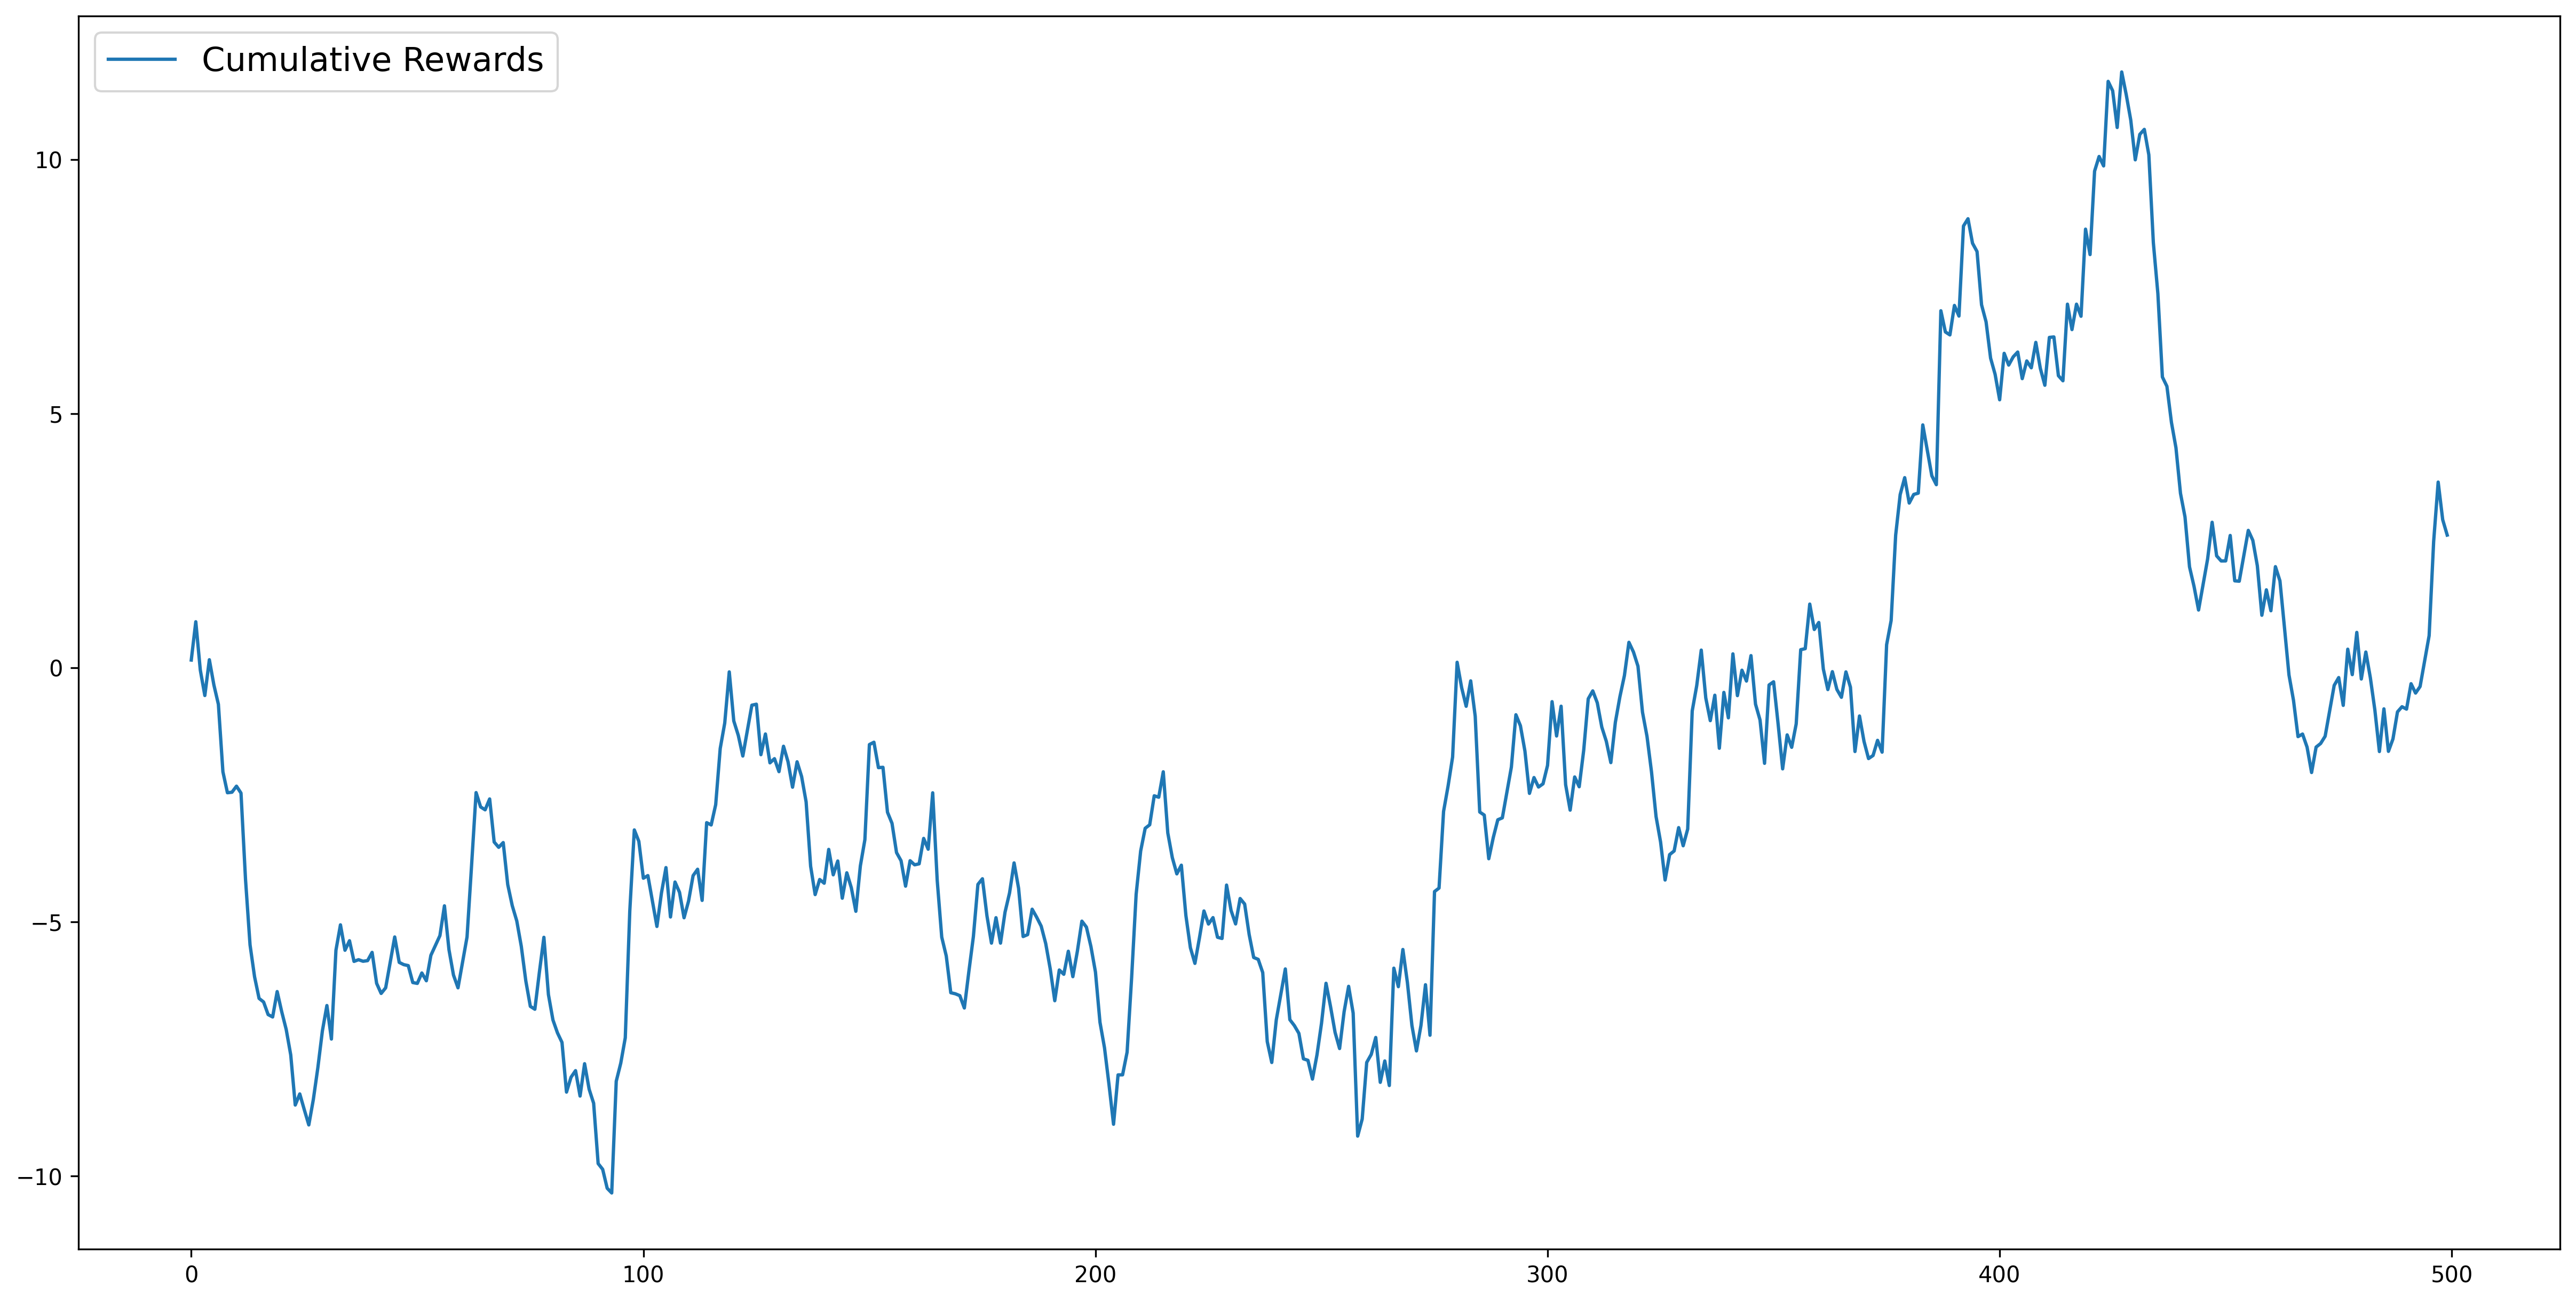

In [6]:
# plot cumulative reward
plt.figure(figsize=(20, 10), dpi=300)
plt.plot(np.cumsum(total_rewards), label='Cumulative Rewards')
plt.legend(fontsize=15)
plt.show()
plt.close()

# Implement your policy;

## Try to achieve highest cumulative reward!!!

In [35]:
# records
arm_rewards = {i:[] for i in range(5)}
total_rewards= []

for t in range(500):
    #######################
    #   your policy here  #
    #   arm = ...         #
    #######################
    epsilon = 0.8
    if random.random() < epsilon:
        arm = random.randint(0, 4)
    else:
        arm = np.argmax(np.array(arm_rewards.values()))
    
    # pull
    reward = bandit.pull(arm)
    
    # record
    arm_rewards[arm] += [reward]
    total_rewards += [reward]

# Visualization

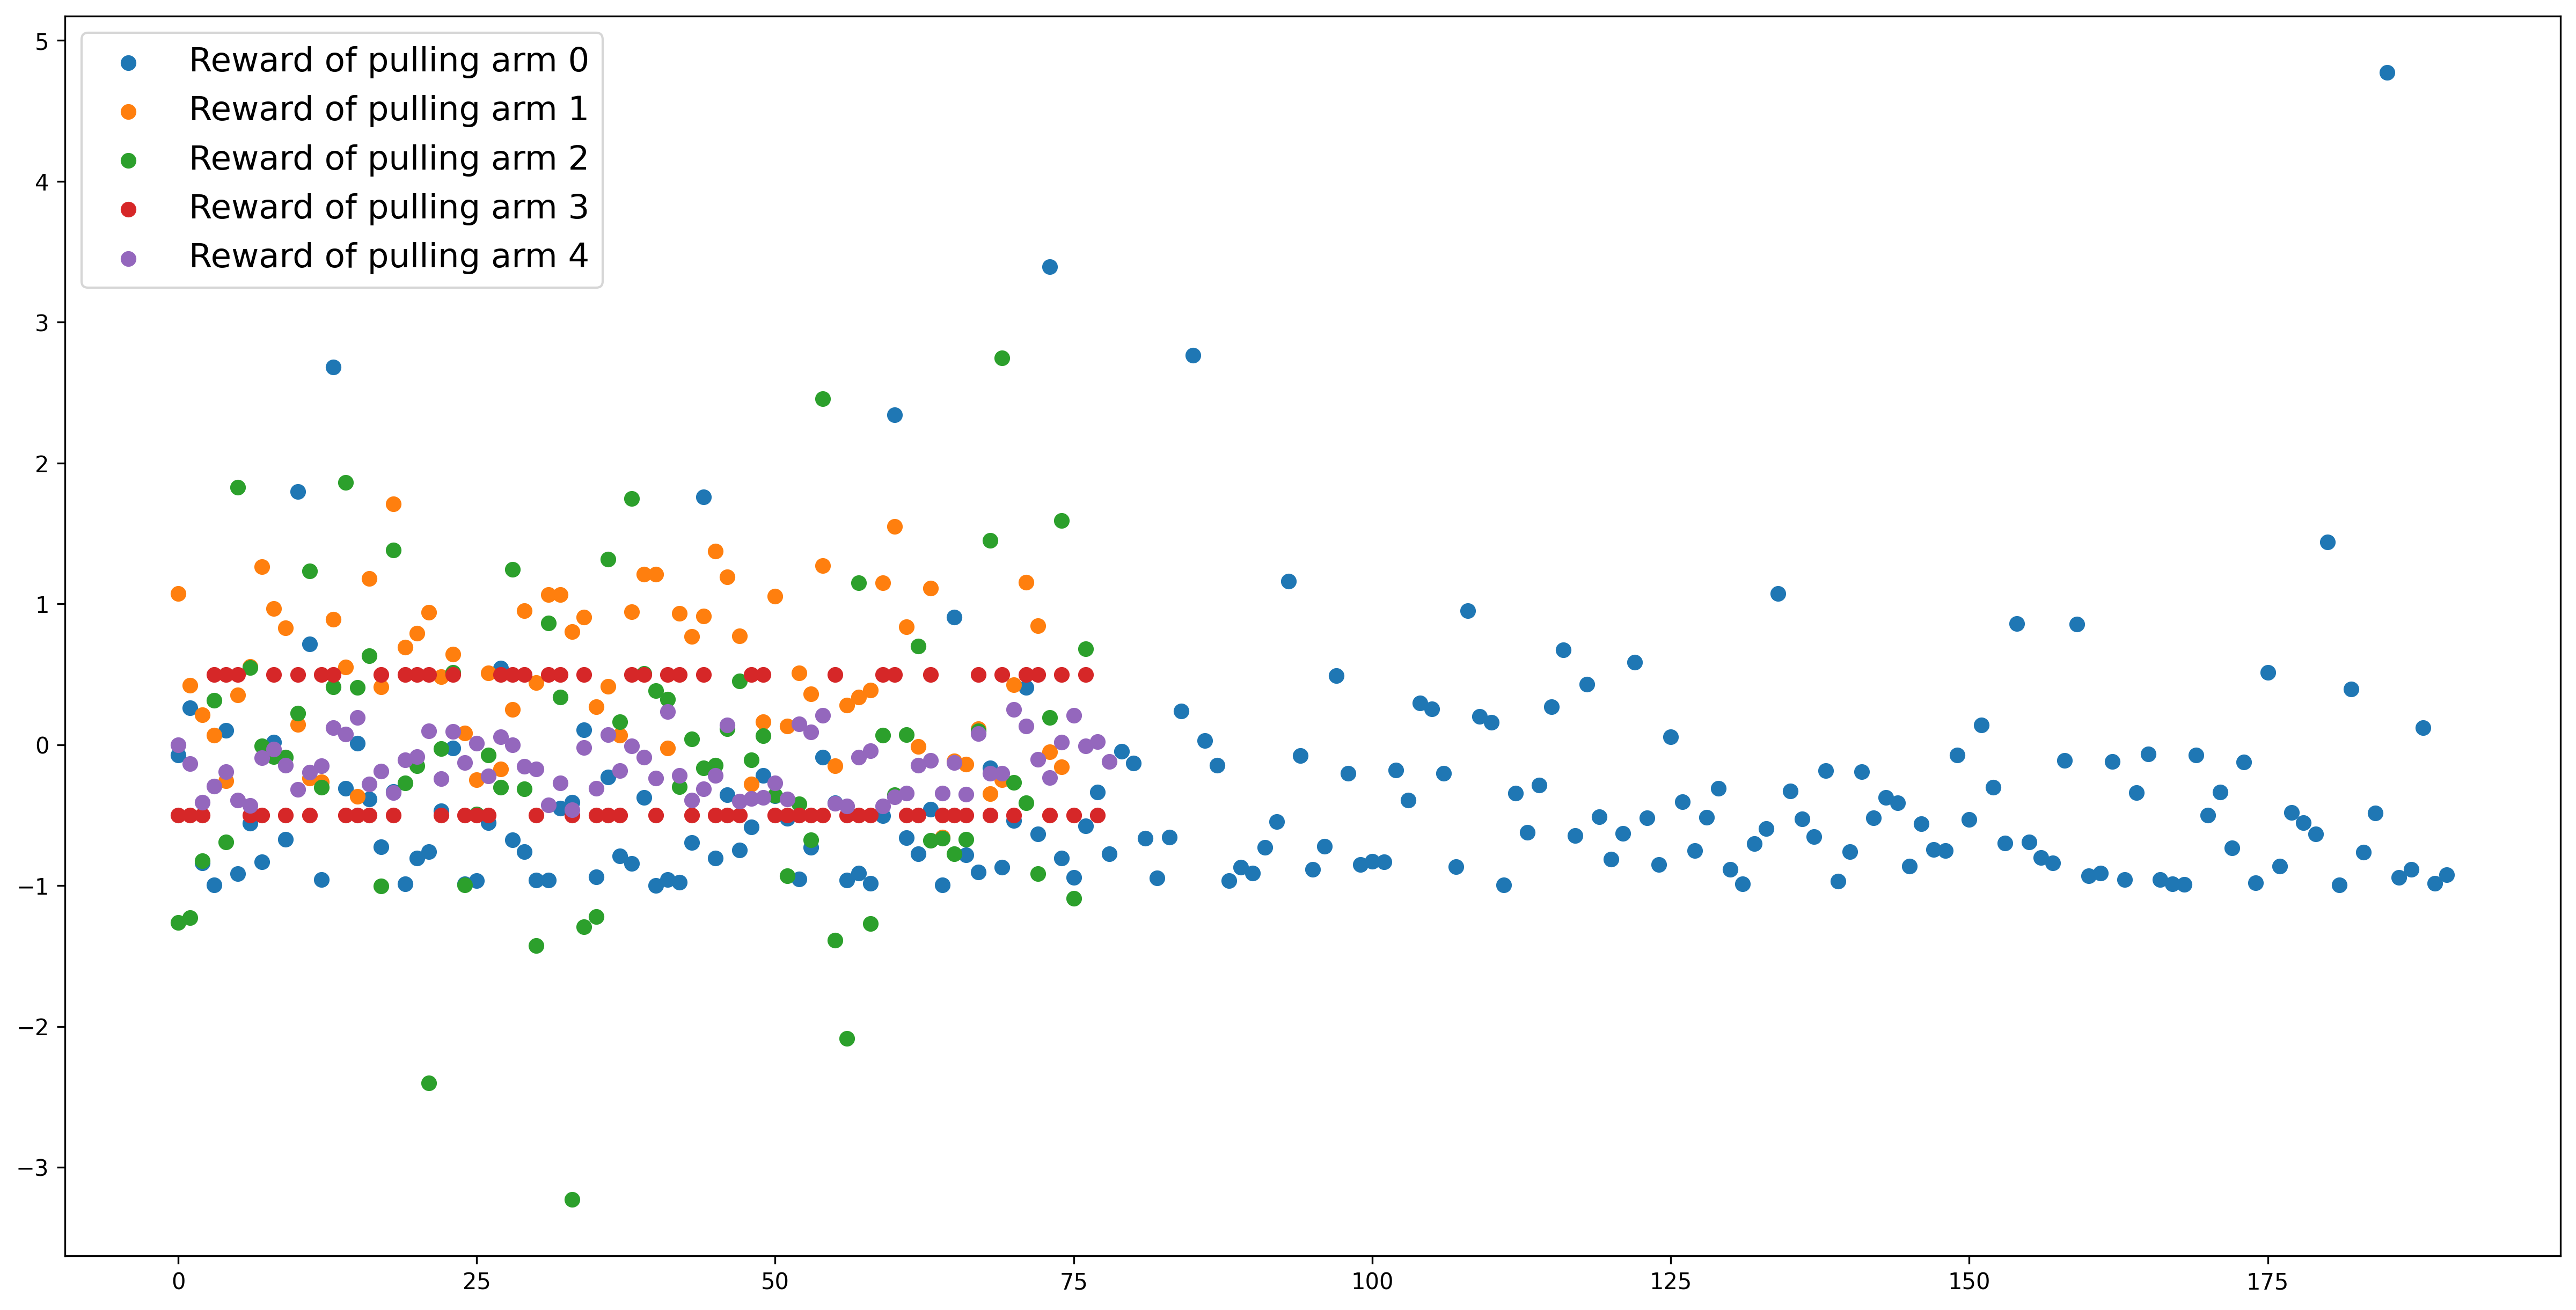

In [36]:
# plot rewards per arm
plt.figure(figsize=(20, 10), dpi=300)
for i in range(5):
    plt.scatter(range(len(arm_rewards[i])), arm_rewards[i], label='Reward of pulling arm {}'.format(i))

plt.legend(fontsize=15)
plt.show()
plt.close()

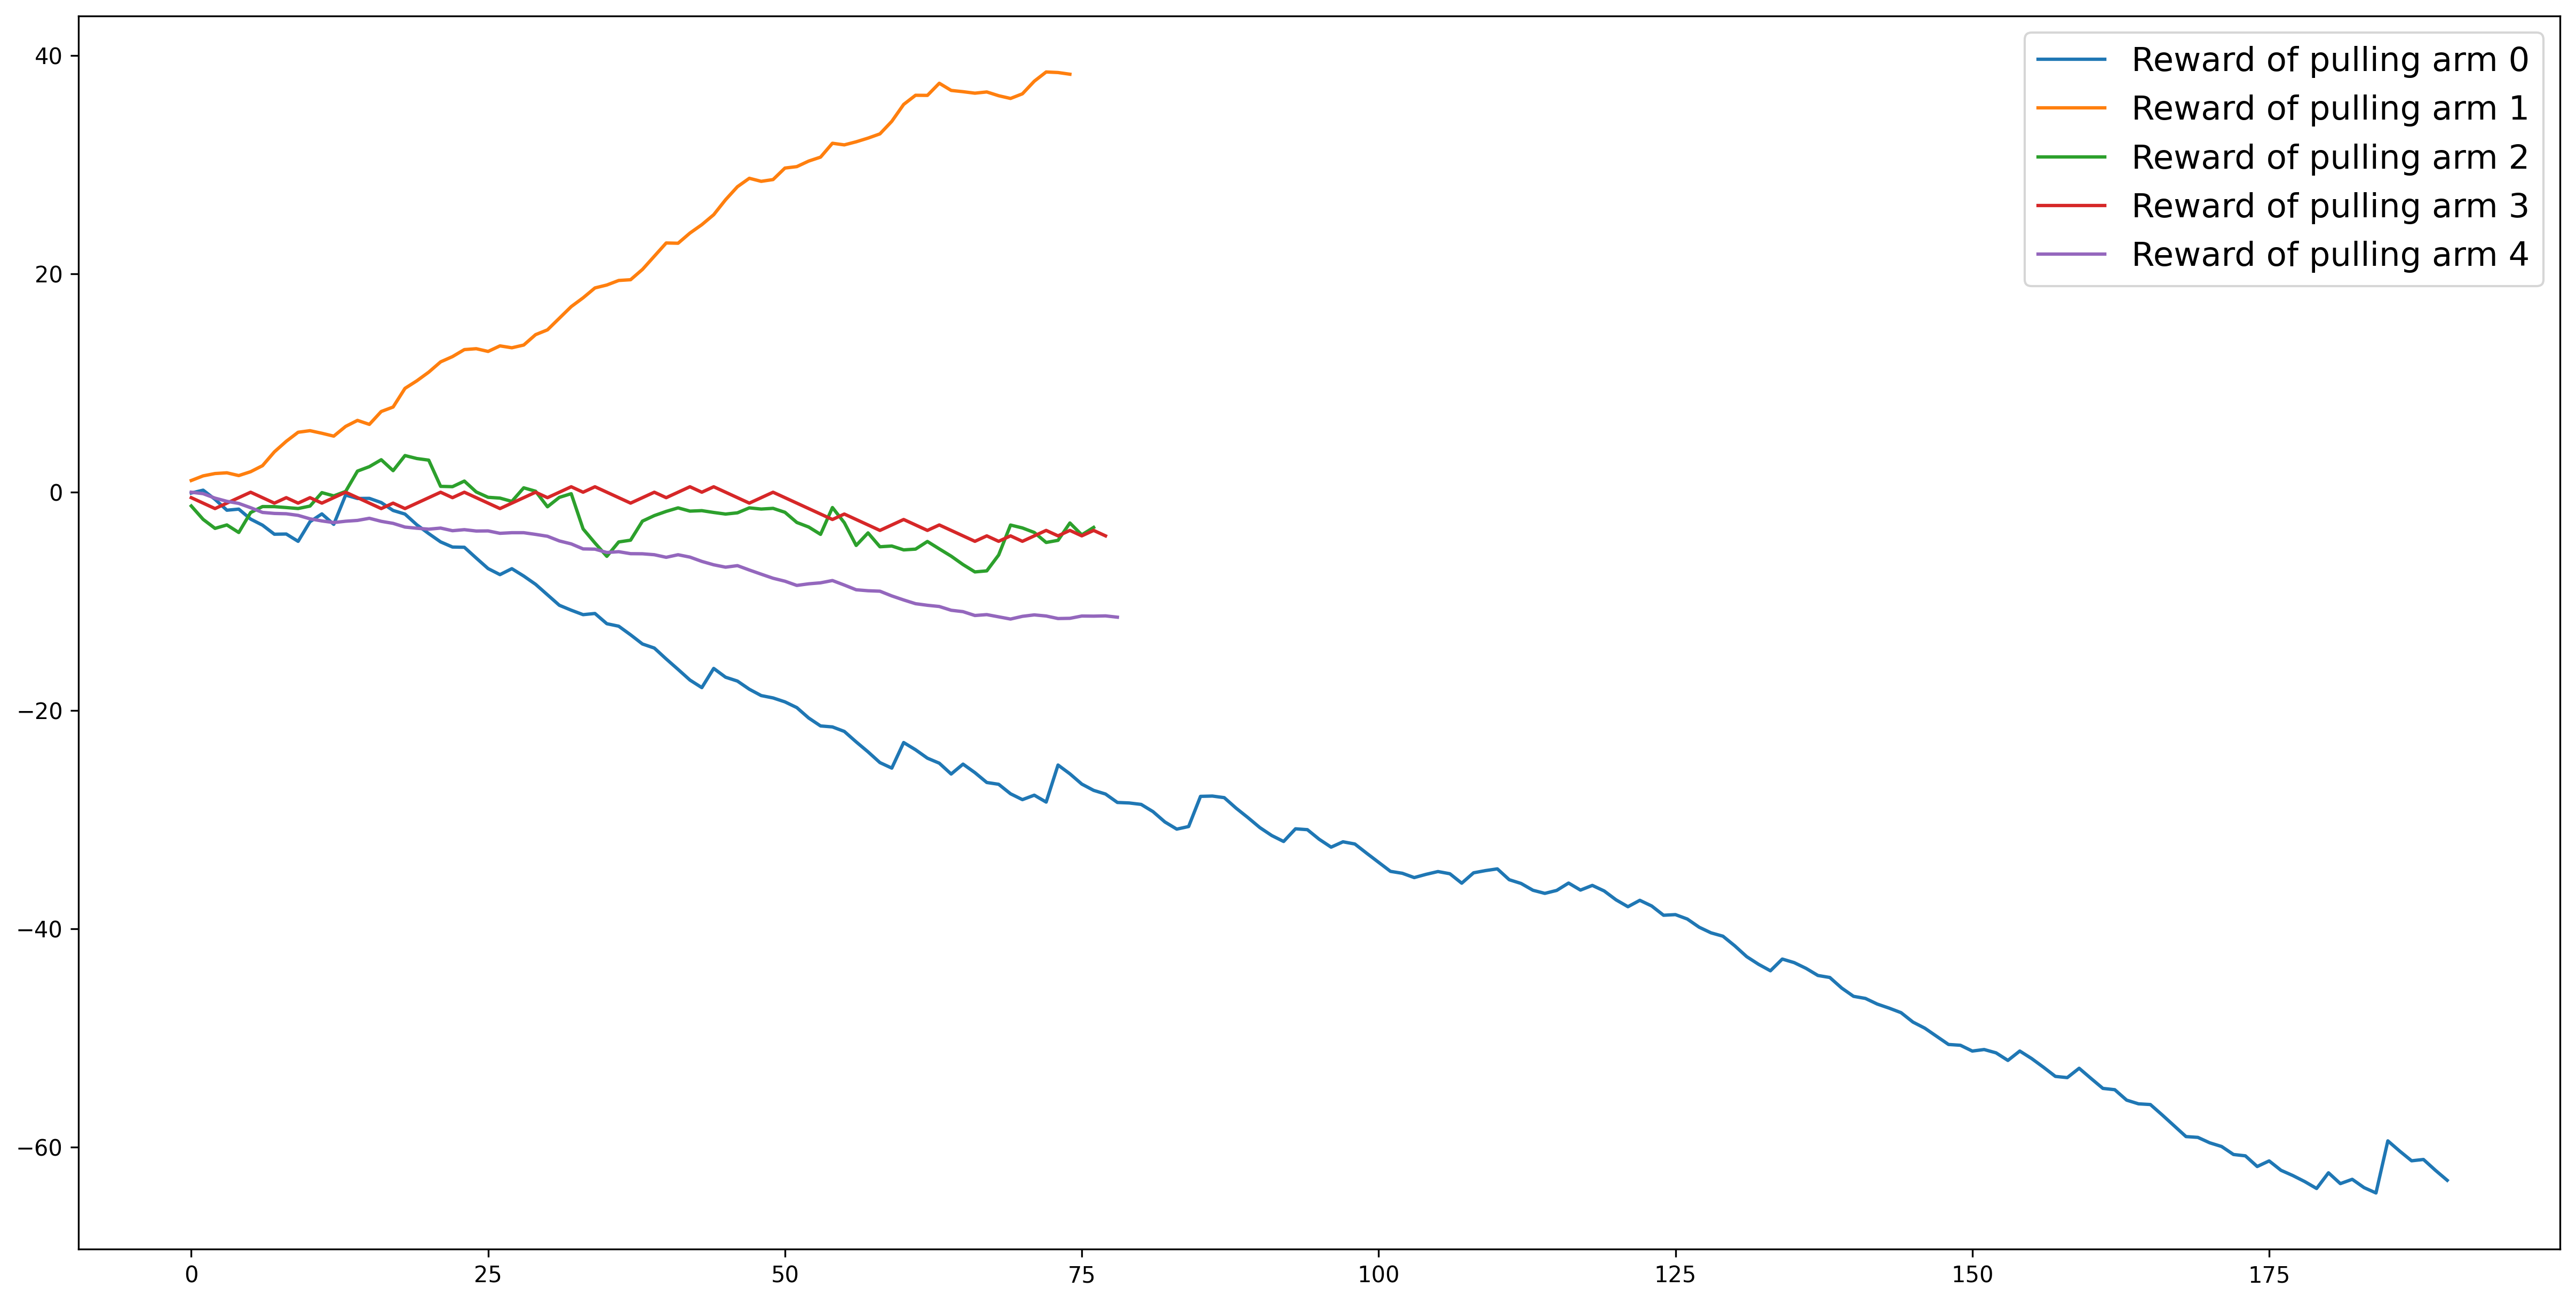

In [37]:
# plot rewards per arm
plt.figure(figsize=(20, 10), dpi=300)
for i in range(5):
    plt.plot(np.cumsum(arm_rewards[i]), label='Reward of pulling arm {}'.format(i))

plt.legend(fontsize=15)
plt.show()
plt.close()

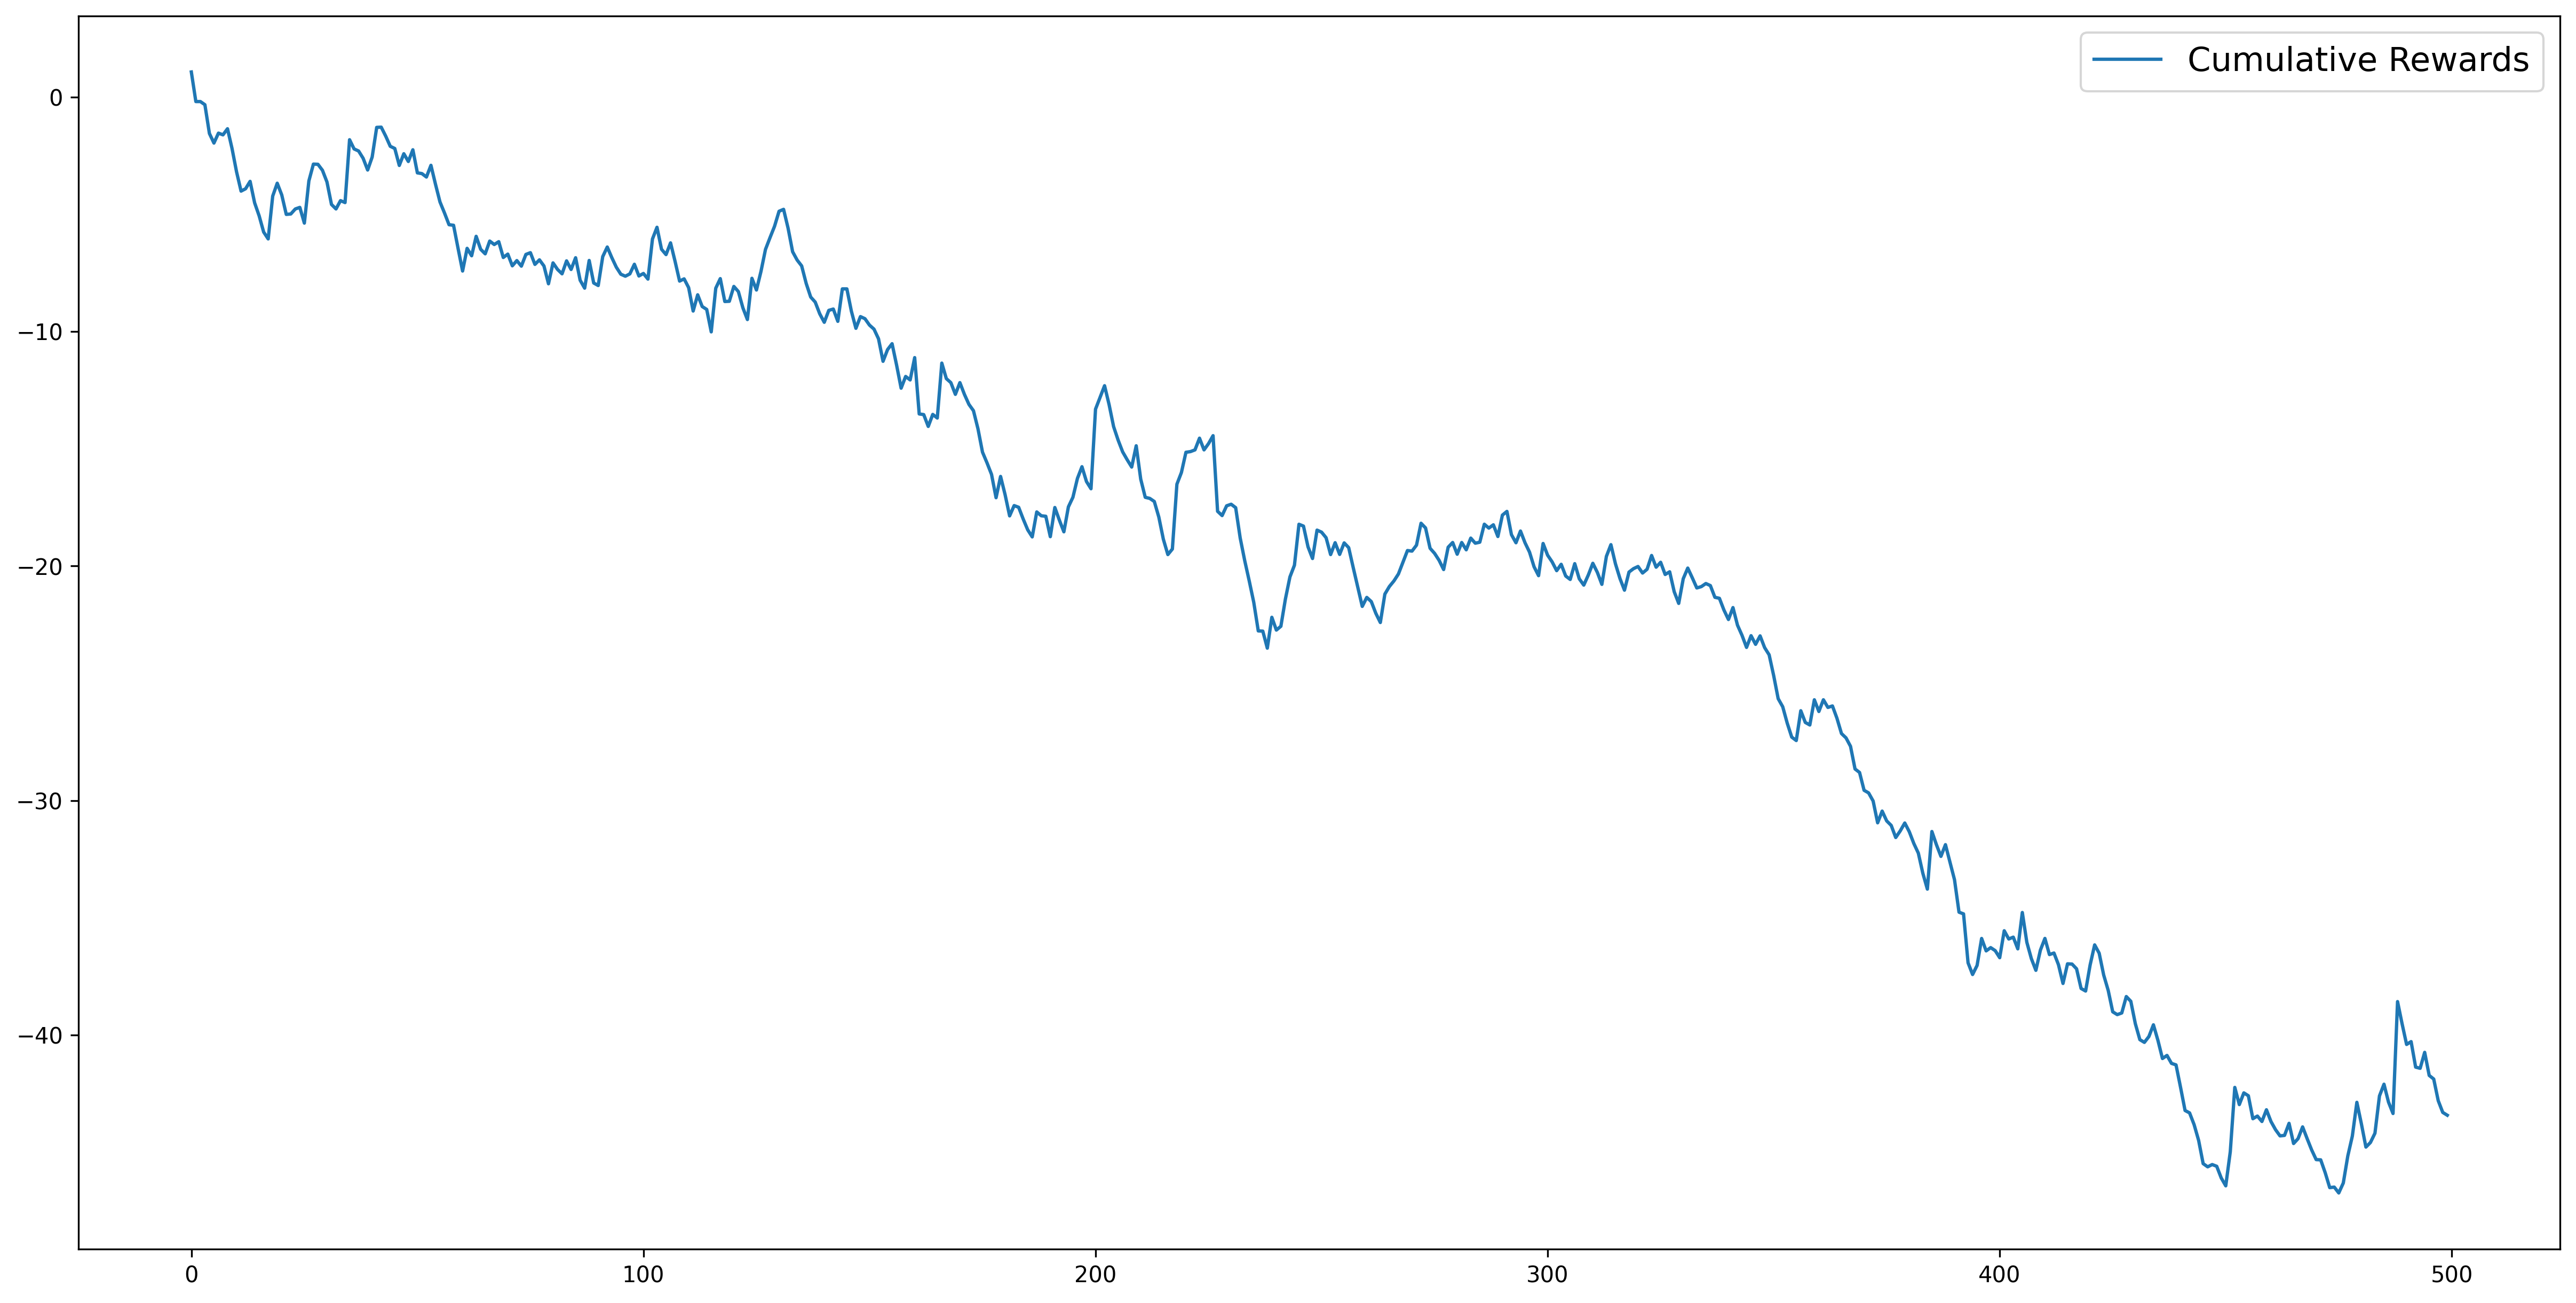

In [38]:
# plot cumulative reward
plt.figure(figsize=(20, 10), dpi=300)
plt.plot(np.cumsum(total_rewards), label='Cumulative Rewards')
plt.legend(fontsize=15)
plt.show()
plt.close()